In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

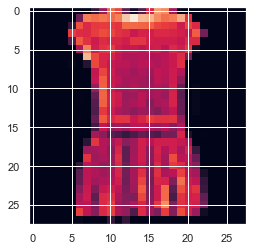

In [5]:
plt.imshow(X_train_full[3])

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", \
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 8ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5295 - val_accuracy: 0.7998
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.3744 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3751 - accuracy: 0.8675 - val_loss: 0.3714 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3632 - accuracy: 0.8716 - val_loss: 0.3623 - val_ac

<AxesSubplot:>

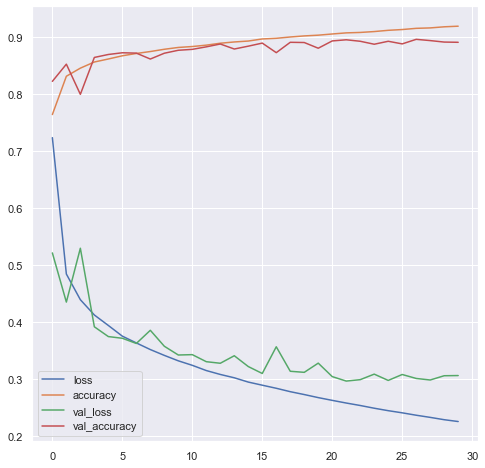

In [15]:
pd.DataFrame(history.history).plot(figsize = (8, 8))

Clearly the algorithm isnt running correctly

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 2.9880 - accuracy: 0.1000


[2.9880452156066895, 0.10000000149011612]

## Regression housing problem

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()

X_train[0]

array([ 1.25000000e+00,  3.60000000e+01,  4.56804734e+00,  1.07100592e+00,
        1.93800000e+03,  3.82248521e+00,  3.39500000e+01, -1.18240000e+02])

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

For regression problems of single output (as in housing example) we require only one output node and no activation function..
cost will be mse

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
 validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.7493
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6172
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4526
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4306
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4194
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4090
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4022
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3964
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3925
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3871
Epoch 11/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3861
Epoch 12/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3828
Epoch 13/20
363/363 [====

In [33]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

162/162 [==============================] - 1s 3ms/step - loss: 34015.0352


array([[153.42665],
       [152.0867 ],
       [148.5495 ]], dtype=float32)

In [36]:
y_test

array([1.227, 1.884, 2.121, ..., 2.639, 2.714, 1.76 ])